<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/ESAA_YB_week6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **앙상블 학습**
### **앙상블 학습 개요**

앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다.

이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있다. 앙상블 알고리즘의 대표격인 랜덤 포레스트와 그래디언트 부스팅 알고리즘은 뛰어난 성능과 쉬운 사용, 다양한 활용도로 인해 많이 애용된다. 부스팅 계열의 앙상블 알고리즘의 인기와 강세가 계속 이어져 그래디언트 부스팅을 뛰어넘는 새로운 알고리즘의 개발이 가속화 되었으며, 이에 따라 XGBoost, LightGBM, Stacking을 포함해 다양한 유형의 앙상블 알고리즘이 머신러닝의 선도 알고리즘으로 인기를 모으고 있다.

앙상블 학습의 유형은 전통적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세 가지로 나눌 수 있으며 이 외에도 스태킹을 포함한 다양한 앙상블 방법이 있따. 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다. 보팅과 배깅의 다른 점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가며 학습을 수행해 보팅을 수행하는 것이다. 대표적인 배깅 방식이 랜덤 포레스트 알고리즘이다.

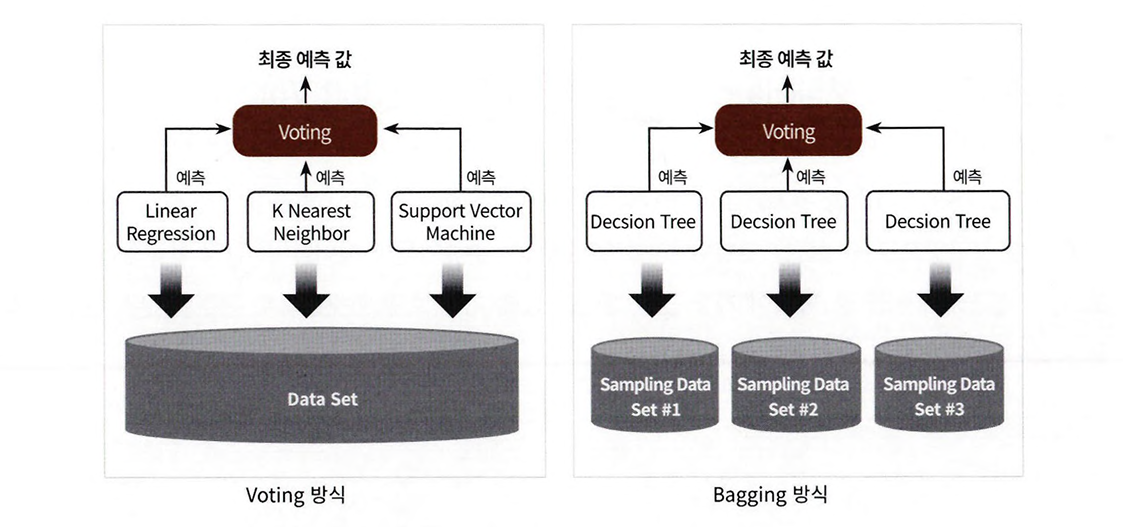

보팅 분류기는 선형 회구, K 최근접 이웃, 서포트 벡터 머신이라는 3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과를 선정한다.

배깅 분류기는 단일 ML 알고리즘으로 여러 분류기가 학습으로 개별 예측을 하는데, 학습하는 데이터 세트가 보팅 방식과는 다르다. 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데 이렇게 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식을 부트스트래핑(Bootstrapping) 분할 방식이라 부른다. 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해 최종 예측 결과를 선정하는 방식이 배깅 앙상블 방식이다. 교차 검증이 데이터 세트 간의 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용한다.

부스팅은 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하며 학습과 예측을 진행한다. 예측 성능이 뛰어나 앙상블 학습을 주도하고 있으며 대표적인 부스팅 모듈로 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)이 있다.

스태킹은 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방식이다.

### **보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

보팅 방법에는 하드 보팅과 소프트 보팅이 있다. 하드 보팅을 이용한 분류는 다수결 원칙과 비슷하다. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것이다. 소프트 보팅은 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정한다. 일반적으로 소프트 보팅 방법이 보팅 방법으로 적용된다.

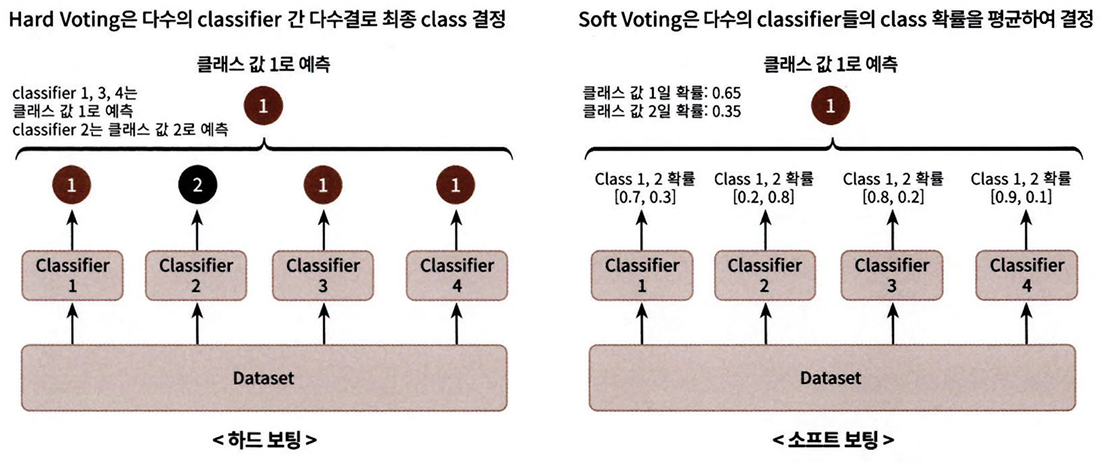

하드 보팅은 Classifier 4개로 구성한 보팅 앙상블 기법에서 분류기 1, 3, 4번이 1로 레이블 값을 예측하고, 분류기 2번이 2로 레이블 값을 예측하면 다수결 원칙에 따라 최종 예측은 레이블 값 1이 된다.

소프트 보팅은 각 분류기의 레이블 값 예측 확률을 평균 내어 최종 결정한다. 일반적으로 하드 보팅보다는 소프트 보팅이 예측 성능이 좋아 더 많이 사용된다.

### **보팅 분류기(Voting Classifier)**
사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공한다.

보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석해 보자. 위스콘신 유방암 데이터 세트는 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트이며 종양의 크기, 모양 등의 형태와 관련한 많은 피처를 가지고 있다. 사이킷런은 load_breast_cancer( ) 함수를 통해 자체에서 위스콘신 유방암 데이터 세트를 생성할 수 있다.

로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만들어보자.

In [6]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57          25.53            152.5   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  

[3 rows x 30 columns]

로지스틱 회귀와 KNN을 기반으로 소프트 보팅 방식으로 새롭게 보팅 분류기를 만들어보자. 사이킷런은 VotingClassifier 클래스를 이용해 보팅 분류기를 생성할 수 있다. VotingClassifier 클래스는 주요 생성 인자로 estimators와 voting 값을 입력 받는다. estimators는 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받으며 voting은 hard, soft를 적용할 수 있다.

In [7]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


보팅 분류기가 정확도가 조금 더 높게 나타났는데, 보팅으로 여러 개의 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않는다. 데이터의 특성과 분포 등 다양한 요건에 따라 기반 분류기 중 가장 좋은 분류기의 성능이 보팅보다 나을 수도 있다.

그럼에도 불구하고 보팅을 포함해 배깅과 부스팅 등의 앙상블 방법은 전반적으로 다른 단일 ML 알고리즘보다 뛰어난 예측 성능을 갖는 경우가 많다. 고정된 데이터 세트에서 단일 ML 알고리즘이 뛰어난 성능을 발휘하더라도 현실 세계는 다양한 변수와 예측이 어려운 규칙으로 구성되어 있기에 다양한 관점을 가진 알고리즘이 서로 결합해 더 나은 성능을 끌어낼 수 있다.

ML 모델의 성능은 테스트 데이터에 의해 검증되므로 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가 요소가 된다. 이런 관점에서 편향-분산 트레이드오프는 ML 모델이 극복해야 할 중요 과제이다. 보팅과 스태킹 등은 서로 다른 알고리즘을 기반으로 하지만, 배깅과 부스팅은 대부분 결정 트리 알고리즘을 기반으로 한다. 결정 트리 알고리즘은 쉽고 직관적인 분류 기준을 갖고 있지만, 정확한 예측을 위해 오히려 과적합이 발생해 실제 테스트 데이터에서 예측 성능이 떨어지는 현상이 발생하기 쉽다. 하지만, 앙상블 학습에서는 이 같은 결정 트리 알고리즘의 단점을 수십~수천 개의 매우 많은 분류기를 결합해 다양한 상황을 학습하게 함으로서 극복한다. 결정 트리 알고리즘의 장점은 그대로 취하고 단점은 보완하며 평향-분산 트레이드 오프의 효과를 극대화할 수 있다.

## **랜덤 포레스트**
### **랜덤 포레스트의 개요 및 실습**
배깅(Bagging)은 여러 개의 분류기를 만들어 봍이으로 최종 결정하는 알고리즘이다. 배깅의 대표적인 알고리즘은 랜덤 포레스트이다. 랜덤 포레스트는 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 잇으며, 다양한 영역에서 높은 예측 성능을 보이고 있다. 랜덤 포레스트의 기반 알고리즘은 결정 트리로서, 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있다.

랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다.

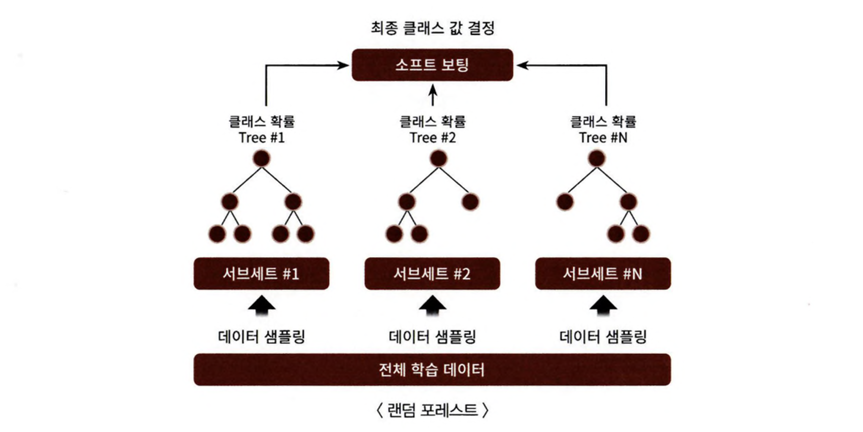

랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트이다. 이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스태래핑(bootstrapping) 분할 방식이라고 한다. 부트스트랩은 통계학에서 여러 개의 작은 데이터 세트를 임의로 만들어 개별 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식을 지칭한다. 랜덤 포레스트의 서브세트 데이터는 이러한 부트스트래핑으로 데이터가 임의로 만들어진다. 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어진다. 원본 데이터의 건수가 10개인 학습 데이터 세트에 랜덤 포레스트를 3개의 결정 트리 기반으로 학습하려고 n_estimators=3으로 하이퍼 파라미터를 부여하면 다음과 같은 데이터 서브세트가 만들어진다.

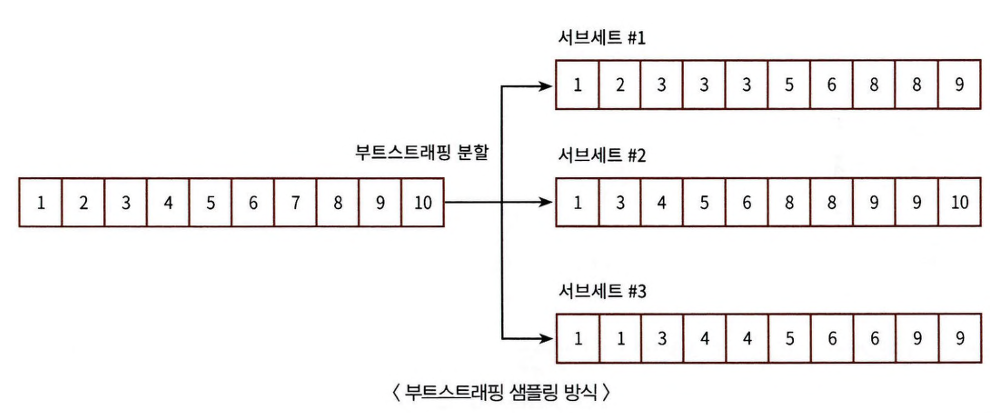

이렇게 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것이 랜덤 포레스트이다. 사이킷런은 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원한다. 앞의 사용자 행동 인식 데이터 세트를 RandomForestClassifier를 이용해 예측해보자.

In [8]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                            if x[1]>0 else x[0], axis=1)

  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [9]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv('features.txt', sep='\s+',
                                header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df( )를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name
  X_train = pd.read_csv('X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('y_train.txt', sep='\s+', names=['action'])
  y_test = pd.read_csv('y_test.txt', sep='\s+', names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도 0.9220


랜덤 포레스트는 사용자 행동 인식 데이터 세트에 대해 약 92.2%의 정확도를 보여준다.

### **랜덤 포레스트 하이퍼 파라미터 및 튜닝**
트리 기반의 앙상블 알고리즘의 단점은 하이퍼 파라미터가 너무 많고, 그로 인한 튜닝을 위한 시간이 많이 소모된다는 것이다. 트리 기반 자체의 하이퍼 파라미터가 원래 많은 데다 배깅, 부스팅, 학습, 정규화 등을 위한 하이퍼 파라미터가 추가되므로 일반적으로 다른 ML 알고리즘에 비해 많을 수 밖에 없다.

- **n_estimators**: 랜덤 포레스트에서 결정 트리의 개수, default는 10개이다. 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아니며, 학습 수행 시간이 오래 걸릴 수 있다.
- **max_features**: 결정 트리에 사용된 max_features 파라미터. 하지만, 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt만큼 참조한다.
- **min_depth, min_samples_leaf, min_samples_split**: 과적합을 개선하기 위해 사용되는 파라미터

이번에는 GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝해보자. 튜닝 시간을 절약하기 위해 n_estimators=10, CV=2로 설정해 최적의 하이퍼 파라미터를 구한다.

In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8,16,24],
    'min_samples_leaf': [1,6,12],
    'min_samples_split': [2,8,16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도: 0.9157


max_depth:16, min_samples_leaf:6, min_samples_split:16일 때 2개의 CV 세트에서 약 91.57%의 평균 정확도가 측정된다. 이렇게 추출된 최적 하이퍼 파라미터로 다시 RandomForestClassifier를 학습시킨 후, 별도의 테스트 데이터 세트에서 예측 성능을 측정해보자.

In [12]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6,
                                max_depth=16, min_samples_split=16, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9209


별도의 테스트 데이터 세트에서 수행한 예측 정확도 수치는 92.09%이다. RandomForestClassifier도 feature_importances_ 속성을 이용해 알고리즘이 선택한 피처의 중요도를 알 수 있다.

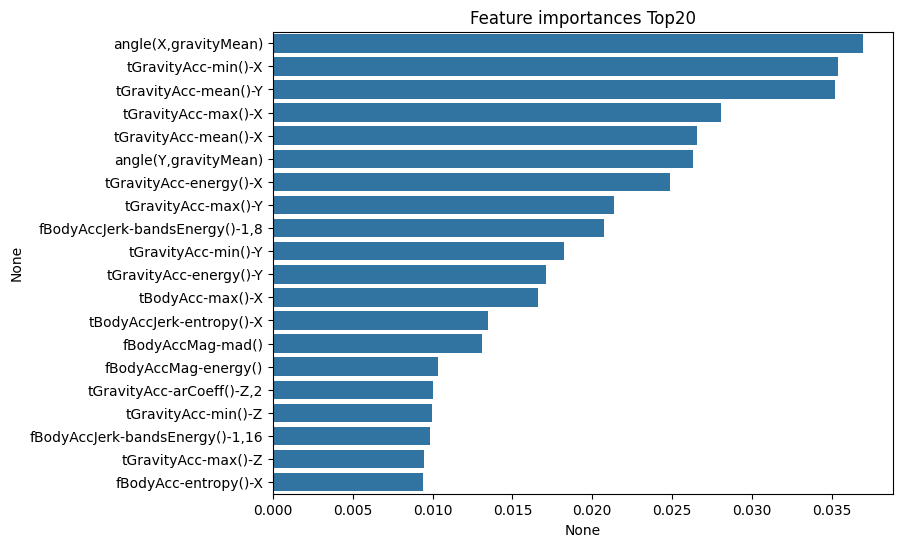

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

angle(X,gravityMean). tGravityAcc-mean( )-Y, tGravityAcc-min( )-X 등이 높은 피처 중요도를 가지고 있다.

## **GBM(Gradient Boosting Machine)**
### **GBM의 개요 및 실습**
부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해 나가며 학습하는 방식이다. 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)와 그래디언트 부스트가 있다. AdaBoost는 오류 데이터에 가중치를 부여하며 부스팅을 수행하는 대표적인 알고리즘이다. 그림을 통해 AdaBoost가 어떻게 학습을 진행하는지 알아보자.

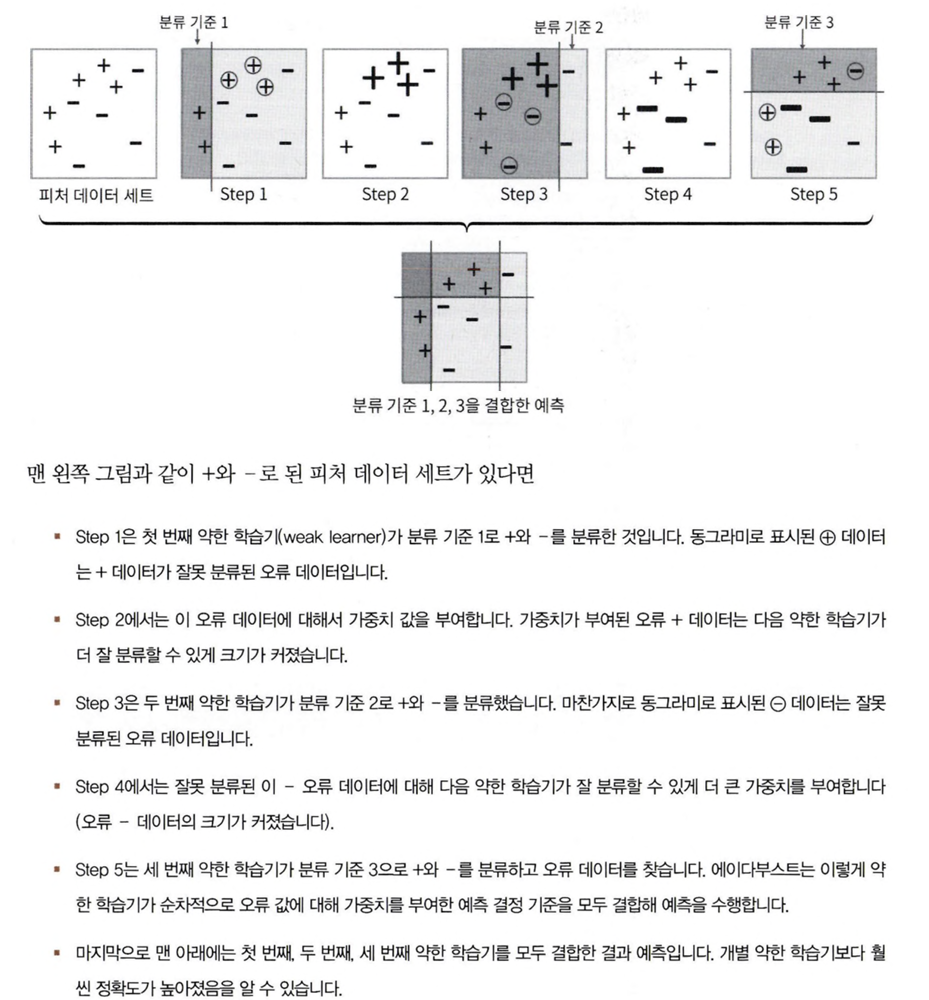

개별 약한 학습기는 각각 가중치를 부여해 결합한다.

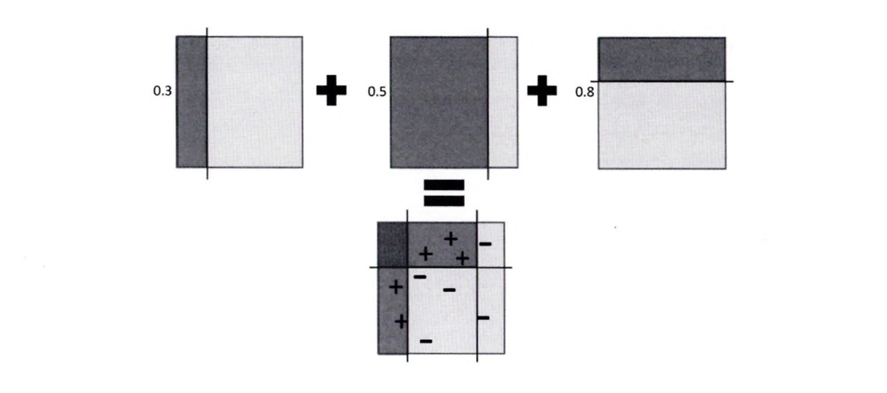

GBM(Gradient Boost Machine)도 AdaBoost와 유사하나 가중치 업데이트를 경사 하강법(Gradient Descent)를 이용하는 것이 큰 차이이다. 오류값은 실제 값 - 예측값이다. 분류의 실제 결괏값을 y, 피처를 $x_1, x_2, ... , x_n$, 그리고 이 피처에 기반한 예측 함수를 $F(x)$ 함수라고 하면 오류식 $h(x) = y-F(x)$이 된다.

이 오류식 $h(x) = y-F(x)$를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것이 경사 하강법(Gradient Descent)이다. 이 경사 하강법은 머신러닝에서 중요한 기법 중 하나이다.

GBM은 CART 기반의 다른 알고리즘과 마찬가지로 분류와 회귀에서 사용할 수 있다. 사이킷런은 GBM 기반의 분류를 위해 GradientBoostingClassifier 클래스를 제공한다. 사이킷런의 GBM을 이용해 사용자 행동 데이터 세트를 예측 분류해보자.

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초".format(time.time()-start_time))

GBM 정확도: 0.9379
GBM 수행 시간: 1217.2 초


기본 하이퍼 파라미터만으로 93.89%의 예측 정확도로 랜덤 포레스트보다 나은 예측 성능을 나타낸다. 일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 뛰어난 경우가 많다. 하지만, 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요하다. 사이킷런의 GradientBoostingClassifier는 약한 학습기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을 사용하더라도 병렬처리가 지원되지 않아 대용량의 데이터의 경우 학습에 매우 많은 시간이 필요하다. 반면에 랜덤 포레스트는 상대적으로 많은 수행 시간을 보장해주기에 더 쉽게 예측 결과를 도출할 수 있다.

### **GBM 하이퍼 파라미터 소개**
**n_estimators, max_depth, max_features** 등
- **loss**: 경사하강법에서 사용할 비용 함수를 지정. default는 'deviance'
- **learning_rate**: GBM이 학습을 진행할 때마다 적용하는 학습률. 0~1 사이의 값을 지정할 수 있으며 default는 0.1이다. 너무 작은 값을 적용하면 업데이트 되는 값이 작아져 예측 성능이 높아질 가능성이 높지만, 수행 시간이 오래 걸리고 최소 오류값을 찾지 못할 수도 있다. 큰 값을 적용하면 최소 오류값을 적용하지 못하고 지나쳐 예측 성능이 떨어질 가능성이 높지만, 빠른 수행이 가능하다. 따라서, learning_rate는 n_estimators와 상호 보완적으로 조합해 사용한다.
- **n_estimators**: weak learner의 개수이다. 개수가 많을수록 예측 성능이 일정 수준까지 좋아질 수 있지만, 개수가 많을수록 수행 시간이 오래 걸린다. default는 100이다.
- **subsample**: weak learner가 학습에 사용하는 데이터 샘플링 비율. 기본값은 1이며, 과적합이 염려될 경우 subsample을 1보다 작은 값으로 설정한다.

GBM은 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘이다. 하지만, 수행 시간이 오래 걸린다는 단점이 있다. GBM이 처음 소개된 이후 많은 알고리즘이 GBM을 기반으로 새롭게 만들어지고 있으며, 그 중 가장 각광을 받고 있는 것은 그래디언트 부스팅 기반 ML 패키지인 XGBoost, LightGBM이다.

## **XGBoost(eXtra Gradient Boost)**
### **XGBoost 개요**
XGBoost는 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘이다. 압도적인 수치의 차이는 아니지만, 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타낸다. XGBoost는 GBM에 기반하지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결해 각광을 받고 있다. 특히, XGBoost는 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습을 완료할 수 있다. 다음은 XGBoost의 주요 장점이다.

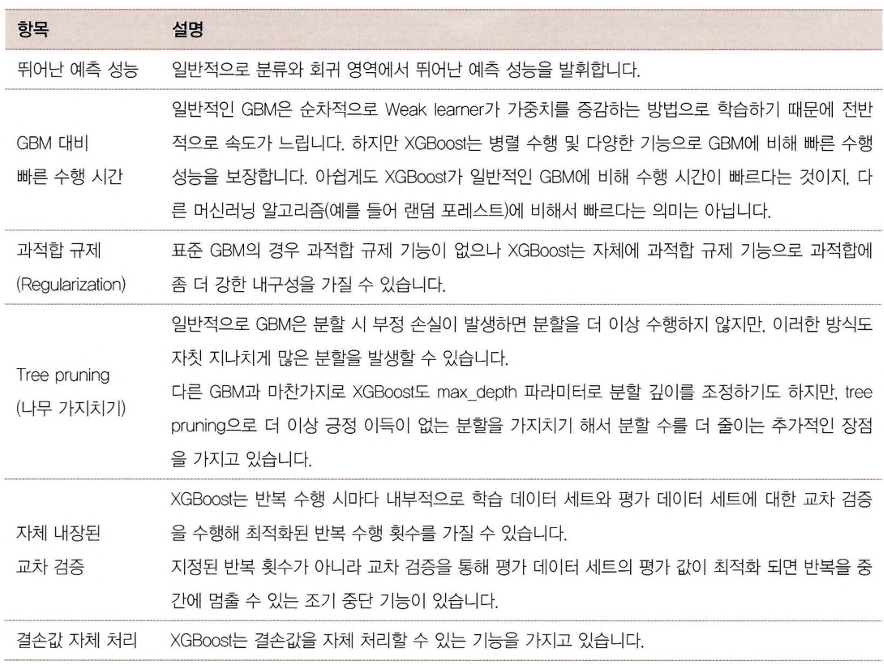

XGBoost의 핵심 라이브러리는 C/C++로 작성되어 있다. 따라서, xgboost 패키지 내에는 XGBoost 전용의 파이썬 패키지와 사이킷런과 호환되는 래퍼용 XGBoost가 함께 존재한다.

XGBoost 패키지의 사이킷런 래퍼 클래스는 XGBClassifier과 XGBRegressor이다. 이를 이용하면 사이킷런 estimator가 학습을 위해 사용하는 fit( )과 predict( )와 같은 표준 사이킷런 개발 프로세스 및 다양한 유틸리티를 활용할 수 있다.

사이킷런 래퍼 XGBoost 모듈은 사이킷런의 다른 Estimator와 사용법이 같은 데에 반해 파이썬 네이티브 XGBoost는 고유의 API와 하이퍼 파라미터를 이용한다.

### **XGBoost 설치하기**

In [15]:
import xgboost as xgb
from xgboost import XGBClassifier

### **파이썬 래퍼 XGBoost 하이퍼 파라미터**
XGBoost는 GBM과 유사한 하이퍼 파라미터를 동일하게 가지고 있으며, 여기에 조기 중단(early stopping), 과적합을 규제하기 위한 하이퍼 파라미터 등이 추가된다.

파이썬 래퍼 XGBoost 모듈과 사이킷런 래퍼 XGBoost 모듈의 일부 하이퍼 파라미터는 약간 다르므로 이에 대한 주의가 필요하다. 동일한 기능을 의미하는 하이퍼 파라미터이지만, 사이킷런 파라미터의 범용화된 이름 규칙에 따라 파라미터 명이 달라진다. 파이썬 래퍼 XGBoost의 하이퍼 파라미터를 알아본 후 사이킷런 래퍼 XGBoost 하이퍼 파라미터가 어떻게 다른지 알아보자.

파이썬 래퍼 XGBoost 하이퍼 파라미터를 유형별로 나누면 다음과 같다.
- **일반 파라미터**: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없다.
- **부스터 파라미터**: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭한다.
- **학습 태스크 파라미터**: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터이다.

대부분의 하이퍼 파라미터는 Booster 파라미터에 속한다.

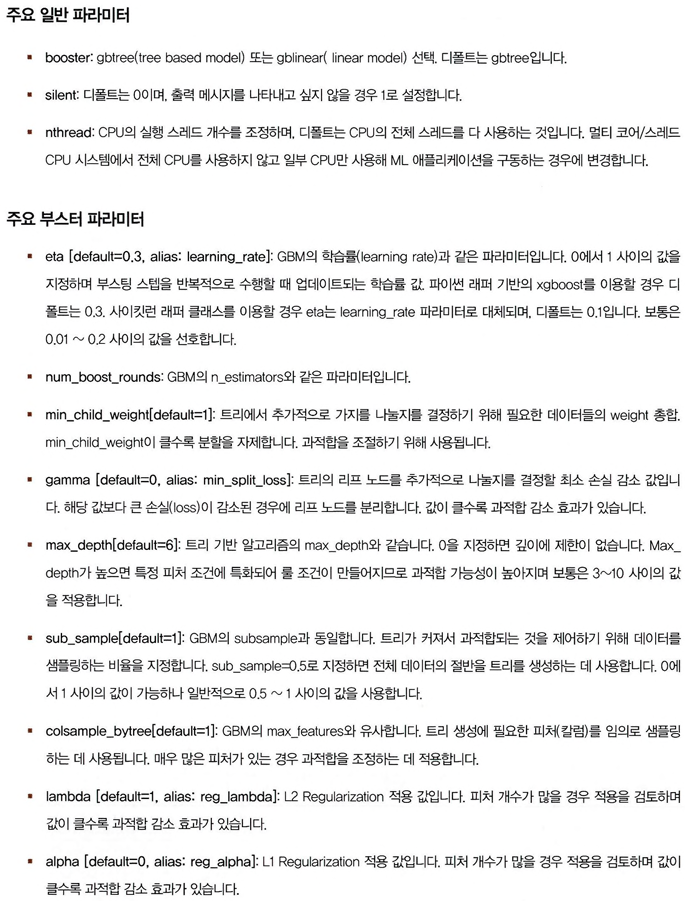

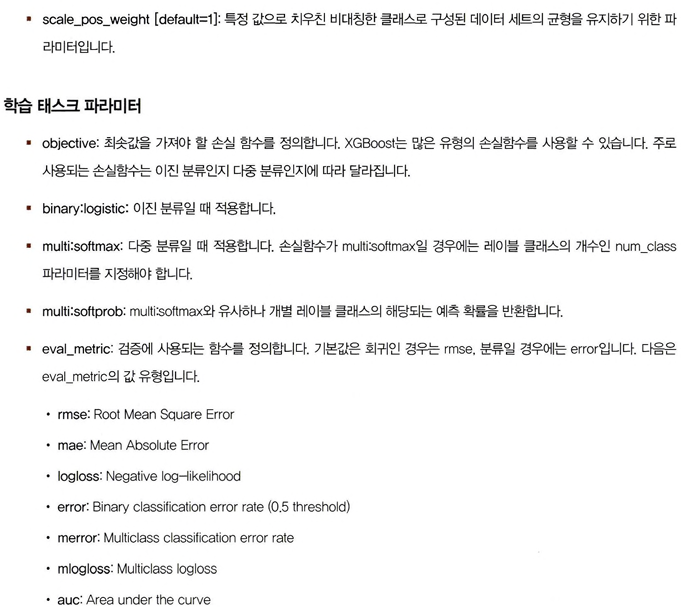

뛰어난 알고리즘일수록 파라미터를 튜닝할 필요가 적다. 그리고 파라미터 튜닝에 들이는 공수 대비 성능 향상 효과가 높지 않은 경우가 대부분이다. 파라미터를 튜닣아는 경우의 수는 여러가지 상황에 따라 달라진다.

과적합 문제가 심각하다면 다음과 같이 적용할 것을 고려할 수 있다.
- eta 값을 낮춘다(0.01~0.1). eta 값을 낮출 경우 num_round(or n_estimators)는 반대로 높여주어야 한다.
- max_depth 값을 낮춘다.
- min_child_wight 값을 높인다.
- gamma를 값을 높인다.
- subsample과 colsample_bytree를 조정하면 트리가 너무 복잡하게 생성되는 것을 막는다.

XGBoost 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 가지고 있다. 또한, XGBoost는 기본 GBM에서 부족한 다른 여러 가지 성능 향상 기능이 있다. 그중에 수행 속도를 향상시키기 위한 대표적인 기능으로 조기 중단(Early Stopping) 기능이 있다. 기본 GBM의 경우 n_estimators에 지정된 횟수만큼 반복적으로 학습 오류를 감소시키며 학습을 진행하며 중간에 반복을 멈출 수 없다. XGBoost, LightGBM은 모두 조기 중단 기능이 있어 n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선할 수 있다.

In [16]:
import xgboost

print(xgboost.__version__)

2.1.4


### **파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**
XGBoost의 파이썬 패키지인 xgboost는 자ㅔ적으로 교차 검증, 성능 평가, 피처 중요도 등으 ㅣ시각화 기능을 가지고 있다. 또한, 조기 중단 기능이 있어 부스팅 반복 횟수에 도달하지 않더라도 더 이상 예측 오류가 개선되지 않으면 중지해 수행 시간을 개선하는 기능도 있다. 일반적으로 수행 성능 향상 XGBoost는 GBM과 다르게 병렬 처리와 조기 중단 등으로 빠른 수행시간 처리가 가능하지만, CPU 코어가 많지 않은 개인용 PC에서는 수행 시간 향상을 경험하기 어려울 수 있다.

위스콘신 유방암 데이터 세트에 기반해 종양의 다양한 피처에 따라 악성종양(malignant)인지 일반 양성종양(benign)인지를 XGBoost를 이용해 예측해보자.

In [17]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']=labels
cancer_df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  

[3 rows x 31 columns]

많은 속성이 숫자형 값으로 되어 있다. 타깃 레이블 값의 종류는 악성인 'malignant'가 0값으로 양성인 'benign'이 1값으로 되어 있다.

In [18]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


1 값인 양성 benign이 357개, 0 값인 악성 malignant가 212개로 구성되어 있다.

위스콘신 유방암 데이터 세트의 80%를 학습용, 20%를 테스트용으로 추출한 뒤, 80%의 학습용 데이터에서 90%를 최종 학습용, 10%를 검증용으로 분할한다. 여기서 검증용 데이터 세트를 별도로 분할하는 이유는 XGBoost가 제공하는 기능인 검증 성능 평가와 조기 중단을 수행해보기 위함이다. cancer_df의 맨 마지막 칼럼이 레이블이므로 피처용 DataFrame은 cancer_df의 첫 번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출한다.

In [19]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개 90%는 학습, 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                            test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


전체 569개의 데이터 세트에서 최종 학습용 409개, 검증용 46개, 테스트용 114개가 추출되었다.

파이썬 래퍼 XGBoost는 사이킷런과 여러 차이가 있지만, 가장 큰 차이는 XGBoost만의 전용 데이터 객체인 DMatrix를 사용한다는 점이다. 때문에 Numpy 또는 Pandas로 되어 있는 학습용, 검증, 테스트용 데이터 세트를 모두 전용의 데이터 객체인 DMatrix로 생성해 모델에 입력해야 한다. DMatrix의 주요 입력 파라미터는 data와 label이다. data는 피처 데이터 세트이며, label은 분류의 경우 레이블 데이터 세트, 회귀의 경우 숫자형인 종속값 데이터 세트이다.

DMatrix는 넘파이, DataFrame, Series 외에 libsvm txt 포맷 파일, xgboost 이진 버퍼 파일을 파라미터로 입력받아 변환할 수 있다.

In [20]:
# 학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

파이썬 래퍼 XGBoost 모듈인 xgboost를 이용해 학습을 수행하기 전에 먼저 XGBoost의 하이퍼 파라미터를 설정한다. XGBoost의 하이퍼 파라미터는 주로 딕셔너리 형태로 입력한다.
- max_depth는 3
- 학습률 eta는 0.1
- 예제 데이터가 0 또는 1 이진 분류이므로 목적함수는 이진 로지스틱
- 오류 함수의 평가 성능 지표는 logloss
- num_rounds는 400회

In [21]:
params = {
    'max_depth':3,
    'eta':0.05,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}
num_rounds=400

지정한 하이퍼 파라미터로 XGBoost 모델을 학습시켜보자. 파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost 모듈의 train( ) 함수에 파라미터로 전달한다. 학습 시 XGBoost는 수행 속도를 개선하기 위해 조기 중단 기능을 제공한다.

조기 중단의 성능 평가는 주로 별도의 검증 데이터 세트를 이용한다. XGBoost는 학습 반복 시마다 검증 데이터 세트를 이용해 성능을 평가할 수 있는 기능을 제공한다. 조기 중단은 xgboost의 train( ) 함수에 early_stopping_rounds 파라미터를 입력해 설정한다. 여기서는 조기 중단 할 수 있는 최소 반복 횟수를 50으로 설정한다.

early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 반드시 평가용 데이터 세트 지정과 eval_metric을 함께 설정해야 한다. Xgboost는 반복마다 지정된 평가용 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정한다.

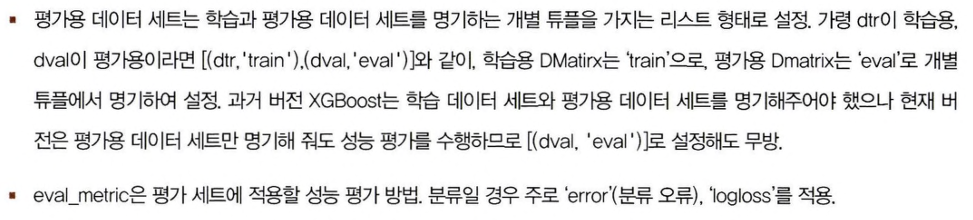

xgboost 모듈의 train( ) 함수를 호출해 학습을 수행해보자. 평가용 데이터 세트 설정은 [(dtr,'train'),(dval,'eval')]와 같이 학습용 DMatrix인 dtr과 검증용 DMatrix인 dval로 설정한 뒤 train( ) 함수의 evals 인자값으로 입력한다. eval_metric는 위에서 params 딕셔너리로 지정되었다. Xgboost 학습 반복 시마다 evals에 설정된 데이터 세트에 대해 평가 지표가 출력된다. train( )은 학습이 완료된 모델 객체를 반환한다.

In [22]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기한다.
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list=[(dval,'eval')]만 명기해도 무방

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds,\
                      early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

train( ) 으로 학습을 수행하면서 반복 시마다 train-logloss와 eval-logloss가 지속적으로 감소하고 있다. 하지만, num_boost_round를 400회로 지정했음에도 학습은 400번을 반복하지 않고 250번째에서 완료했다.

xgboost를 이용해 모델의 학습이 완료되었으면 이를 이용해 테스트 데이터 세트에 예측을 수행해 보자. 파이썬 래퍼 XGBoost는 train( ) 함수를 호출해 학습이 완료된 모델 객체를 반환하게 되는데 이 모델 객체는 예측을 위해 predict( ) 메서드를 이용한다. 한 가지 유의할 점은 사이킷런의 predict( ) 메서드는 예측 결과 클래스 값을 반환하는데 반해 xgboost의 predict( )는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환한다.

In [23]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


평가에서 생성한 get_clf_eval 함수를 이용해 XGBoost 모델의 예측 성능을 평가해보자.

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [25]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test , pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  f1 = f1_score(y_test,pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
  F1： {3:.4f}, AUC：{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [26]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,   F1： 0.9740, AUC：0.9965


이번에는 xgboost 패키지에 내장된 시각화 기능을 수행해보자. xgboost의 plot_importance( ) API는 피처의 중요도를 막대 그래프 형식으로 나타낸다. 기본 평가 지표로 f스코어를 기반으로 해당 피처의 중요도를 나타낸다. f스코어는 해당 피처가 트리 분할 시 얼마나 자주 사용되었는지를 지표로 나타낸 값이다. 사이킷런은 Estimator 객체의 feature_importances_ 속성을 이용해 직접 시각화 코드를 작성해야 하지만, xgboost 패키지는 plot_importance( )를 이용해 바로 피처 중요도를 시각화 할 수 있다. plot_importance( ) 호출 시 파라미터로 앞에서 학습이 완료된 모델 객체 및 맷플롯립의 ax 객체를 입력하기만 하면 된다.

내장된 plot_importance( ) 이용 시 유의할 점은 xgboost를 DataFrame이 아닌 넘파이 기반의 피처 데이터로 학습 시에는 넘파이 피처명을 제대로 알 수가 없으므로 Y축의 피처명을 나열 시, f0, f1 과 같이 피처 순서별로 f자 뒤에 순서를 붙여 피처명을 나타낸다.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

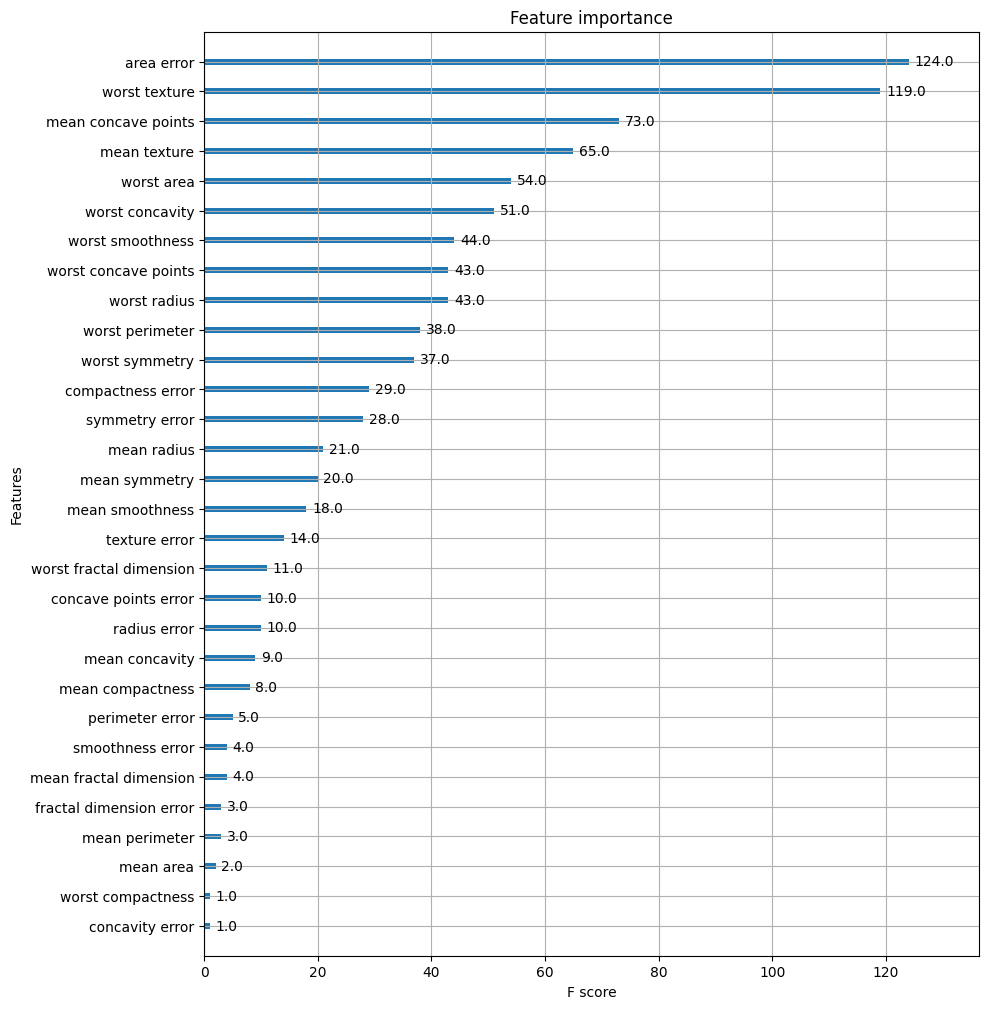

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

결정 트리에서 보여준 트리 기반 규칙 구조도 xgboost에서 시각화할 수 있다. xgboost 모듈의 to_graphviz( ) API를 이용하면 바로 규칙 트리 구조를 그릴 수 있다.

파이썬 래퍼 XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv( ) API로 제공한다. 다음은 cv( ) API와 파라미터에 대한 설명이다.

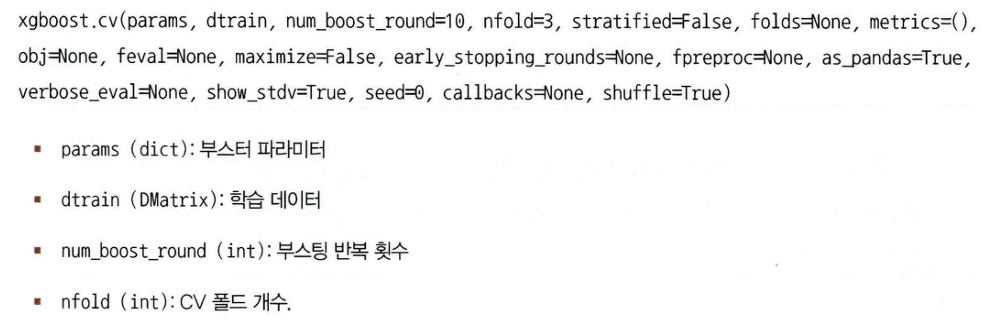

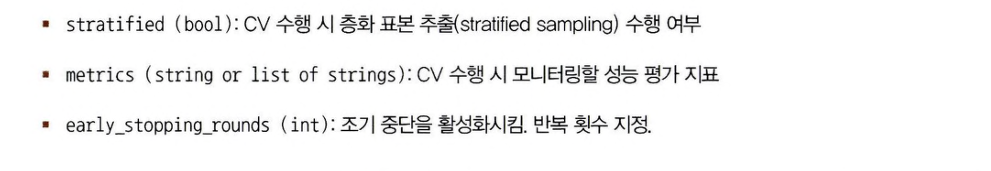

xgb.cv의 반환값은 DataFrame 형태이다. XGBoost르 위한 사이킷런 래퍼는 사이킷런과 호환되어 편리하게 사용할 수 있다.

### **사이킷런 래퍼 XGBoost의 개요 및 적용**
사이킷런 전용의 XGBoost 래퍼 클래스는 사이킷런의 기본 Estimator를 그대로 상속해 만들었기 때문에 다른 Estimator와 동일하게 fit( ), predict( ) 만으로 학습과 예측이 가능하고, GridSearchCV, Pipeline 등 사이킷런의 다른 유틸리티를 그대로 사용할 수 있다. 사이킷런을 위한 래퍼 XGBoost는 크게 분류를 위한 래퍼 클래스인 XGBClassifier, 회귀를 위한 래퍼 클래스인 XGBRegressor이다.

파이썬 래퍼 XGBoost와 사이킷런 래퍼 XGBoost의 하이퍼 파라미터에는 약간 차이가 있다. XGBClassifier는 기존 사이킷런에서 일반적으로 사용하는 하이퍼 파라미터와 호환성을 유지하기 위해 기존의 xgboost 모듈에서 사용하던 네이티브 하이퍼 파라미터 몇 개를 다음과 같이 변경하였다.

- eta -> learning_rate
- sub_sample -> subsample
- lambda -> reg_lambda
- alpha -> reg_alpha

또한 xgboost의 n_estimators와 num_boost_round 하이퍼 파라미터는 서로 동일한 파라미터이다. 만일 두 개가 동시에 사용되면 파이썬 래퍼 XGBoost API에서는 n_estimators 파라미터를 무시하고 num_boost_round 파라미터를 적용한다. 하지만, XGBClassifier와 같은 사이킷런 래퍼 XGBoost 클래스에서는 n_estimators 파라미터를 적용한다.

위스콘신 대학 병원의 유방암 데이터 세트를 분류를 위한 래퍼 클래스인 XGBClassifier를 이용해 예측해보자.

In [28]:
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                            eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [29]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,   F1： 0.9806, AUC：0.9954


파이썬 래퍼 XGBoost 보다 더 좋은 평가 결과가 나왔다. 이유는 위스콘신 데이터 세트의 개수가 작은데 이전에는 조기 중단을 위해 최초 학습 데이터인 X_train을 다시 X_tr, X_val로 분리하면서 최종 학습 데이터 건수가 작아지기 때문에 발생한 것으로 추정된다. 하지만, 데이터 건수가 많은 경우라면 원본 학습 데이터를 다시 학습과 검증 데이터로 분리하고 여기에 조기 중단 회수를 적절하게 부여할 경우 일반적으로는 과적합을 개선할 수 있어 모델 성능이 조금 더 향상될 수 있다.

이번에는 사이킷런 래퍼 XGBoost에서 조기 중단을 수행해보자. 조기 중단과 관련한 파라미터를 fit( )에 입력하면 된다. 관련 파라미터는 평가 지표가 향상될 수 있는 반복 횟수를 정의하는 early_stopping_rounds, 조기 중단을 위한 평가 지표인 eval_metric, 그리고 성능 평가를 수행할 데이터 세트인 eval_set이다. 파이썬 래퍼 예제와 마찬가지로 최초 학습 데이터에서 다시 분리된 최종 학습 데이터와 검증 데이터를 이용해 학습과 조기 중단을 적용해보자.

In [33]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=50, eval_metric="logloss")
evals = [(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr, y_tr,
                eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]


[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

n_estimators가 400이지만, 400번을 반복하지 않고, 파이썬 래퍼의 조기 중단과 동일하게 250번에서 학습을 마무리 한다.

조기 중단으로 학습된 XGBClassifier의 예측 성능을 살펴보자. 결과는 파이썬 래퍼의 조기 중단 성능과 동일하다.

In [34]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,   F1： 0.9740, AUC：0.9961


하지만 조기 중단값을 너무 급격하게 줄이면 예측 성닝이 저하될 우려가 크다. 만일 early_stopping_rouds를 10으로 하면 아직 성능이 향상될 여지가 있음에도 불구하고 10번 반복하는 동안 성능 평가 지표가 향상되지 않으면 반복이 멈춰 버려서 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있다.

In [36]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

피처의 중요도를 시각화하는 모듈인 plot_importance( ) API에 사이킷런 래퍼 클래스를 입력해도 앞에서 파이썬 래퍼 클래스를 입력한 결과와 똑같이 시각화 결과를 도출한다.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

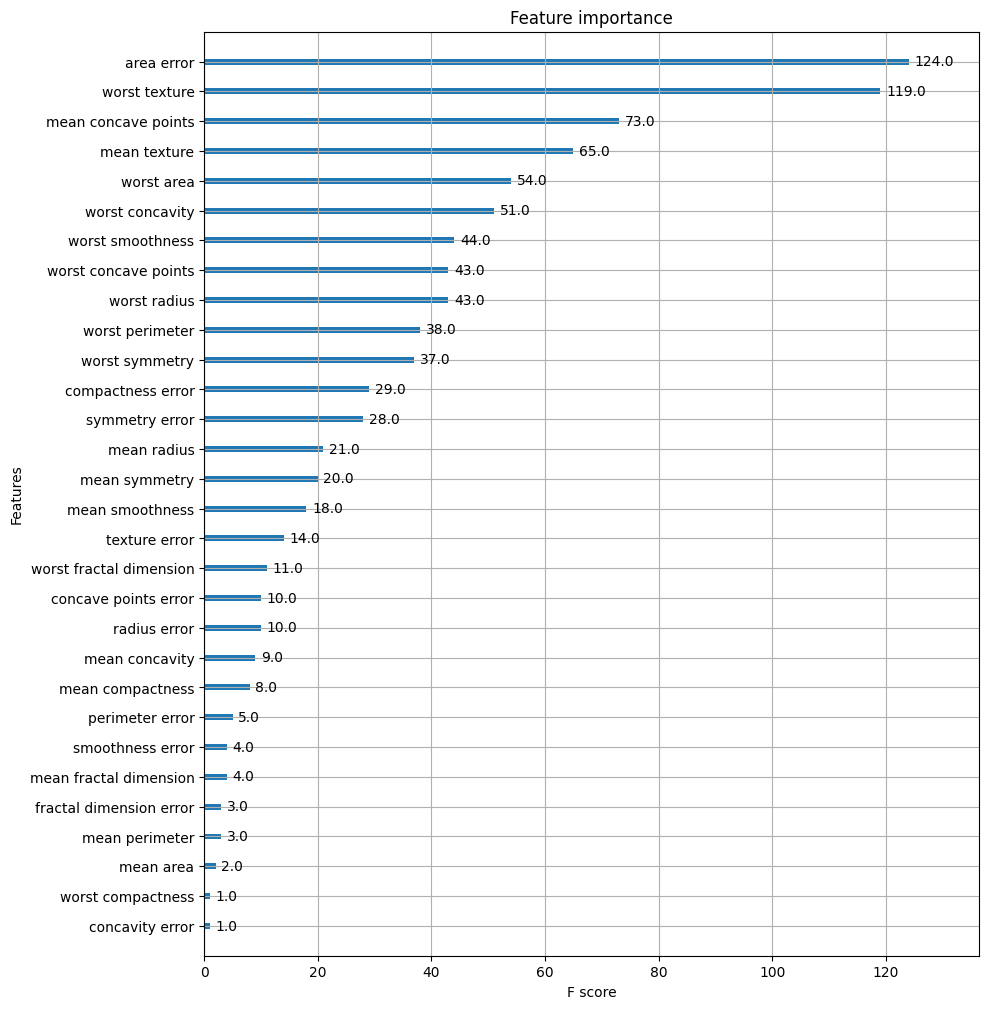

In [37]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)